In [1]:
# Dark theme for Jupyter Notebook
# install jupyterthemes
# !pip install jupyterthemes
#!jt -t onedork -cellw 98% -f roboto -T -tfs 12
#!jt -r

# Image Classification using Deep CNN in Keras

### Objective
- To implement the techniques learnt as a part of the course. Classify weeds and crop.

### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.
- The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

### Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your model.

### Steps and tasks:
- 1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
- 2. Data Pre-processing: (15 Marks)

a. Normalization.

b. Gaussian Blurring.

c. Visualize data after pre-processing.
- 3. Make data compatible: (10 Marks)

a. Convert labels to one-hot-vectors.

b. Print the label for y_train[0].

c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
- 4. Building CNN: (15 Marks)

a. Define layers.

b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
- 5. Fit and evaluate model and print confusion matrix. (10 Marks)
- 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

##### Note:
-  Download the train images from the Olympus Platform.
- Do not download the dataset from Kaggle, as:
- The dataset is big. The dataset has 2 files for train and test images, but the labels are only for the train file. Test file has no labels associated with it. So, when you want to know the accuracy of model on test images, there’s no way to measure it. That’s why the data provided to you on Olympus has only train images and their labels. For our purpose we use this for our training and testing and validation purpose.


### Problem Statement


- Image Classification using Deep CNN

### 1. Import libraries, Load and explore the data, print shape of data, visualize the images in dataset (5 Marks)

In [2]:
import math
import numpy as np
import pandas as pd
from glob import glob

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Suppress scientific notation in numpy outputs
np.set_printoptions(suppress=True)

In [3]:
# Load the image data
data_array = np.load('images.npy')
# Print the data shape
print(data_array.shape)

(4750, 128, 128, 3)


Image Id:200


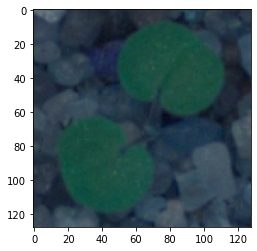

In [4]:
# Display the images in the image dataset
i = 200
image = data_array[i]
print('Image Id:'+ str(i))
plt.imshow(image);

In [8]:
# Load the labels
label = pd.read_csv('Labels.csv')
# Print the shape of the labels
print(label.shape)
print('_________________________________________________________________________')
print(label.info())
print('_________________________________________________________________________')
# Print the unique labels
print('unique label number:'+ str(label.Label.nunique()))
print('_________________________________________________________________________')
print(label.Label.unique())
label.head()

(4750, 1)
_________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB
None
_________________________________________________________________________
unique label number:12
_________________________________________________________________________
['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


### 2. Data Pre-processing (15 Marks)

- a. Normalization.

- b. Gaussian Blurring.

- c. Visualize data after pre-processing.

In [15]:
# Normalize the data
pics = data_array.astype('float32') / 255.0
pics

array([[[[0.13725491, 0.20392157, 0.30588236],
         [0.14117648, 0.19215687, 0.29803923],
         [0.12156863, 0.1764706 , 0.27058825],
         ...,
         [0.30588236, 0.37254903, 0.44705883],
         [0.29803923, 0.3647059 , 0.43137255],
         [0.3137255 , 0.37254903, 0.42745098]],

        [[0.12941177, 0.18039216, 0.26666668],
         [0.14509805, 0.19607843, 0.28627452],
         [0.1882353 , 0.25490198, 0.3254902 ],
         ...,
         [0.31764707, 0.3764706 , 0.44313726],
         [0.2901961 , 0.34901962, 0.4117647 ],
         [0.3254902 , 0.37254903, 0.42745098]],

        [[0.13333334, 0.19607843, 0.26666668],
         [0.13725491, 0.20392157, 0.28235295],
         [0.27450982, 0.33333334, 0.39607844],
         ...,
         [0.3254902 , 0.38039216, 0.4392157 ],
         [0.30980393, 0.36862746, 0.42352942],
         [0.30980393, 0.36862746, 0.41960785]],

        ...,

        [[0.13725491, 0.19607843, 0.27058825],
         [0.16470589, 0.22352941, 0.28627452]

In [16]:
# ! pip install opencv-python
# Apply Gaussian Blurring
Xb = pics
import cv2
for i in range(len(pics)):
    Xb[i] = cv2.GaussianBlur(pics[i], (5, 5), 0)

Image Id:200


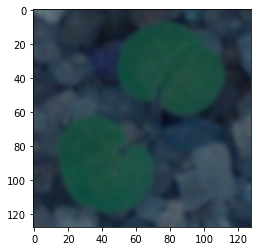

In [17]:
# Display the blur images
i = 200
imageXb = Xb[i]
print('Image Id:'+ str(i))
plt.imshow(imageXb);

### 3. Make data compatible: (10 Marks)

- a. Convert labels to one-hot-vectors.

- b. Print the label for y_train[0].

- c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)

- d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [18]:
# label mapping
mapping_dict={'Small-flowered Cranesbill':0, 
               'Fat Hen':1, 
               'Shepherds Purse':2, 
               'Common wheat':3,
               'Common Chickweed':4, 
               'Charlock':5, 
               'Cleavers':6, 
               'Scentless Mayweed':7, 
               'Sugar beet':8,
               'Maize':9, 
               'Black-grass':10, 
               'Loose Silky-bent':11}
y = label.replace(mapping_dict)
y= keras.utils.to_categorical(y, 12) #Convert labels to one-hot-vectors
print(y.shape)
y

(4750, 12)


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
# Split data into test and train to build the model.
X = Xb
X_train, X_test0, y_train, y_test0 = train_test_split(X, y, train_size=0.7, random_state=0)
print('the training set size:')
print(X_train.shape[0]/X.shape[0])

the training set size:
0.7


In [20]:
# Print the label for y_train[0]
y_train0_label = y_train[0]
print(y_train0_label)
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
y_train0_index = get_indexes(1,y_train0_label)
y_train0_index[0]
# Identify the name of the category
value_to_find = y_train0_index[0]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
Black-grass: 10


In [23]:
# Further split data into validation and test to build the model.
X_valid, X_test, y_valid, y_test = train_test_split(X_test0, y_test0, train_size=0.5, random_state=0)
print('the testing set size:')
print(X_test.shape[0]/X.shape[0])

the testing set size:
0.15010526315789474


In [24]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)
(3325, 12)
(712, 12)
(713, 12)


### Note: the format already met Keras model format

### 4. Building CNN: (15 Marks)

- a. Define layers.

- b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [25]:
%%time
# Clear the session and set a random seed
tf.keras.backend.clear_session()
tf.random.set_seed(1)

# Initiate the model and add layers
nn = tf.keras.models.Sequential([Conv2D(32, (3,3), padding='same', activation='relu', input_shape=X_train.shape[1:]),
                                 Conv2D(32, (3,3), activation='relu'),
                                 MaxPooling2D(2, 2),
                                 Dropout(0.25),
                                 Conv2D(64, (3,3), padding='same', activation='relu'),
                                 Conv2D(64, (3,3), activation='relu'),
                                 MaxPooling2D(2, 2),
                                 Dropout(0.25),
                                 Flatten(),
                                 Dense(512, activation = 'relu'), 
                                 Dropout(0.5),
                                 Dense(12, activation = 'softmax')]) 

# Add loss function, optimizer and evaluation metric to the model
nn.compile(loss = 'categorical_crossentropy', 
             optimizer = 'Adam', 
             metrics = ['accuracy']) 

# Add constraints and record best weights to resume 
callbacks = [
    EarlyStopping(
        monitor='val_loss',             # Monitor validation loss history
        min_delta=0.001,                # Stop training when validation loss is no longer improving by at least 0.001
        patience=10,                    # Look at validation loss improvement over the last 10 epochs
        verbose=1), 
    
   ModelCheckpoint('./nn1/best_weights_nn1.h5',
      monitor='val_loss',
       verbose=1,
      save_best_only=True,
      save_weights_only=True,
      mode='auto')
]

print(nn.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 63, 63, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

### 5. Fit and evaluate model and print confusion matrix. (10 Marks)

In [26]:
# Train the model
nn.fit(X_train, y_train, validation_data = (X_valid, y_valid), callbacks=callbacks, epochs = 15, verbose = 1)

Epoch 1/15
104/104 [==============================] - ETA: 0s - loss: 2.0460 - accuracy: 0.2896
Epoch 00001: val_loss improved from inf to 1.56852, saving model to ./nn1\best_weights_nn1.h5
104/104 [==============================] - 58s 558ms/step - loss: 2.0460 - accuracy: 0.2896 - val_loss: 1.5685 - val_accuracy: 0.4677
Epoch 2/15
104/104 [==============================] - ETA: 0s - loss: 1.5335 - accuracy: 0.4608
Epoch 00002: val_loss improved from 1.56852 to 1.44057, saving model to ./nn1\best_weights_nn1.h5
104/104 [==============================] - 60s 577ms/step - loss: 1.5335 - accuracy: 0.4608 - val_loss: 1.4406 - val_accuracy: 0.5084
Epoch 3/15
104/104 [==============================] - ETA: 0s - loss: 1.3107 - accuracy: 0.5426
Epoch 00003: val_loss improved from 1.44057 to 1.31515, saving model to ./nn1\best_weights_nn1.h5
104/104 [==============================] - 59s 572ms/step - loss: 1.3107 - accuracy: 0.5426 - val_loss: 1.3151 - val_accuracy: 0.5449
Epoch 4/15
104/104 [

In [27]:
#Evaluate Model
scores = nn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 2s 94ms/step - loss: 1.2729 - accuracy: 0.7167
Test loss: 1.2728766202926636
Test accuracy: 0.7166900634765625


In [28]:
y_pred = nn.predict(X_test)
y_pred

array([[0.        , 0.00283667, 0.        , ..., 0.        , 0.00000075,
        0.99715084],
       [0.56910074, 0.36138538, 0.04615413, ..., 0.00250158, 0.00000006,
        0.00001114],
       [0.00000796, 0.00002844, 0.00416951, ..., 0.00016131, 0.        ,
        0.        ],
       ...,
       [0.00000516, 0.00058779, 0.00000005, ..., 0.0000194 , 0.50857496,
        0.32508686],
       [0.0002415 , 0.028426  , 0.00000423, ..., 0.00003947, 0.00009303,
        0.00009074],
       [0.        , 0.00000001, 0.00000526, ..., 0.00000001, 0.        ,
        0.        ]], dtype=float32)

In [29]:
# Select a class with the highest probability
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([11,  0,  4, 11,  9, 10,  3,  8,  4,  4, 11,  4,  0,  1,  9,  7,  0,
       11,  8, 11,  8, 11,  8,  8,  7,  1,  0, 11,  7,  8, 11,  4,  9,  7,
        1,  0,  9,  9,  0,  1,  1,  0,  0,  4, 10, 11,  1,  5,  4,  0,  6,
        3,  2,  7,  8,  0,  6,  4,  4,  2, 11,  7,  4,  7,  8,  4,  4,  0,
        4, 10,  2, 11,  4,  5,  0,  4,  0,  7,  8,  4,  9,  1,  5,  4,  7,
        8,  9, 11,  4,  8,  7,  4,  6,  5,  4,  4,  9,  6, 11,  5,  7,  3,
        4,  4,  4,  2, 11,  0, 11,  4,  1, 11,  4,  2,  8,  3,  4,  7,  0,
        3,  8, 10,  5, 11,  0, 11,  6,  4,  7,  6,  1,  4,  1, 11,  0, 11,
        4,  6,  3,  0,  4,  4,  4, 11,  1,  4,  7,  0, 11,  8, 11,  0,  7,
        1,  4,  0,  7,  5,  8, 11, 11,  6, 11,  4,  0,  7, 11,  1,  1,  1,
        0,  4,  4,  7,  0,  7,  7,  5,  8,  3,  5,  4,  6,  4,  1, 11,  4,
        5, 11,  2,  3, 11,  4,  6,  0,  0,  5, 10,  4,  4,  1, 11, 10, 11,
        0,  1,  4,  9,  7,  4,  0,  9,  6,  7,  0,  4,  4,  4,  4,  8,  0,
       11, 11,  1,  4,  7

In [30]:
y_test_class = np.argmax(y_test, axis=1)
y_test_class

array([11,  1,  2, 11,  9, 10,  3,  8,  4,  4, 11, 11,  0,  1,  9,  7,  0,
        7,  8, 11,  8, 11,  8,  7,  7,  1,  0, 11,  7,  8, 11,  7,  9,  7,
        1,  0,  9,  9,  0,  1,  1,  0,  0,  7, 10, 11,  1,  5,  4,  0,  6,
        3,  5,  6,  8,  0,  6,  9,  4,  7, 11,  7,  4,  7,  8,  4,  1,  0,
        4, 10,  8, 10,  9,  5,  0,  4,  0,  5,  8,  4,  9,  1,  1,  4,  1,
        8,  9, 11,  1,  8,  7,  7,  6,  5,  2,  4,  9,  6,  3,  5,  7,  9,
        4,  4,  9,  7, 10,  0, 10,  4,  3, 11,  4,  2,  8, 11,  4,  7,  0,
        3,  8, 10,  1, 10,  0,  1,  6,  0,  8,  6,  1,  2,  1, 11,  0, 10,
        4, 11,  8,  0,  9, 10,  4, 10,  1,  2,  7,  0, 11,  0, 10,  0,  7,
        7,  8,  9,  7,  5,  8, 10, 11,  6, 10,  0,  2,  8, 10,  8,  1,  1,
        0,  4,  4,  7,  0,  7,  9,  5,  5,  3,  5,  7,  6,  4,  1,  3, 11,
        5, 11,  2,  3, 11,  4,  6,  0,  0,  5, 10,  2,  9,  1, 11, 10, 10,
        0,  1,  4,  9,  9,  9,  0,  7,  1,  2,  0,  2,  4,  4,  4,  8,  0,
       11, 11,  1,  4,  7

In [31]:
# Create a confusion matrix
cm = pd.crosstab(y_test_class, y_pred_class, rownames = ['Actual'], colnames = ['Prediction'])
cm

Prediction,0,1,2,3,4,5,6,7,8,9,10,11
Actual,,,,,,,,,,,,
0,73,0,2,0,7,0,0,0,2,0,0,0
1,1,45,0,1,4,2,2,2,2,0,0,3
2,1,0,9,0,13,0,0,1,0,0,0,0
3,0,5,0,23,0,0,0,0,0,0,2,6
4,0,0,1,0,89,0,0,2,0,0,0,0
5,2,0,1,0,0,50,1,3,2,0,0,0
6,0,1,0,0,0,2,32,4,1,0,0,0
7,0,2,3,0,14,1,0,57,1,1,0,4
8,4,2,1,1,6,0,0,6,40,2,0,0


### 6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

Ground Truth:
Shepherds Purse: 2
Predicted:
Common Chickweed: 4


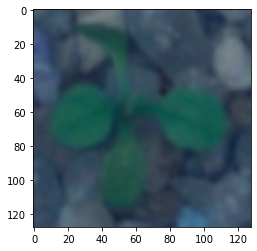

In [38]:
# Display an image from a test set
test_image = X_test[2]
plt.imshow(test_image);
print('Ground Truth:')
value_to_find = y_test_class[2]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')
print('Predicted:')
value_to_find = y_pred_class[2]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')

Ground Truth:
Loose Silky-bent: 11
Predicted:
Loose Silky-bent: 11


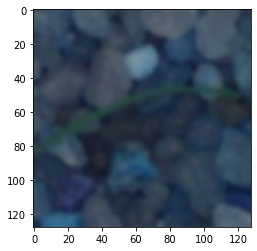

In [39]:
test_image = X_test[3]
plt.imshow(test_image);
print('Ground Truth:')
value_to_find = y_test_class[3]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')
print('Predicted:')
value_to_find = y_pred_class[3]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')

Ground Truth:
Scentless Mayweed: 7
Predicted:
Scentless Mayweed: 7


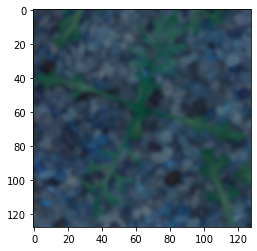

In [40]:
test_image = X_test[33]
plt.imshow(test_image);
print('Ground Truth:')
value_to_find = y_test_class[33]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')
print('Predicted:')
value_to_find = y_pred_class[33]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')

Ground Truth:
Maize: 9
Predicted:
Maize: 9


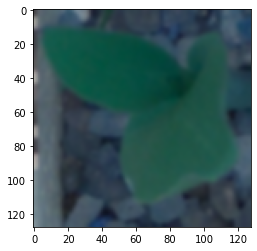

In [41]:
test_image = X_test[36]
plt.imshow(test_image);
print('Ground Truth:')
value_to_find = y_test_class[36]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')
print('Predicted:')
value_to_find = y_pred_class[36]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')

Ground Truth:
Scentless Mayweed: 7
Predicted:
Shepherds Purse: 2


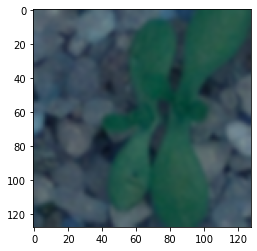

In [42]:
test_image = X_test[59]
plt.imshow(test_image);
print('Ground Truth:')
value_to_find = y_test_class[59]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')
print('Predicted:')
value_to_find = y_pred_class[59]
for key, value in mapping_dict.items():
    if value == value_to_find:
        print(f'{key}: {value}')